# dragen real estate price predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#housing.info()

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20, 15))

# traintest spliting

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    #print(shuffled)
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
#train_set, test_set = split_train_test(housing, 0.2) 

In [10]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set.copy()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


# #looking for corelation

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694553
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

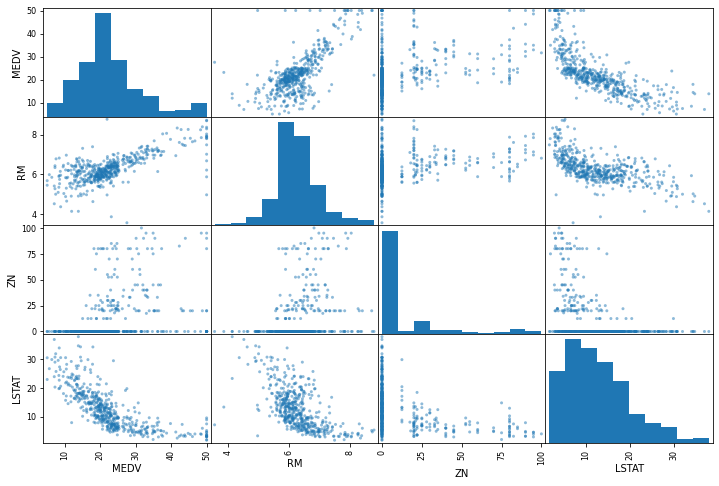

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

# attribute combination

In [19]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [21]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# #missing attribute

In [22]:
median = housing["RM"].median()

In [23]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
X = imputer.transform(housing)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [27]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278720,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711823,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# creating pipwline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])


In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr.shape

(404, 13)

selecting  a desired model

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [32]:
some_data = housing.iloc[:5]


In [33]:
some_labels = housing_labels.iloc[:5]


In [34]:
prepared_data = my_pipeline.transform(some_data)

In [35]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

# Evaluating the model

In [36]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [37]:
mse

0.0

# cross validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [39]:
rmse_score

array([4.19244384, 5.81738354, 5.54537821, 3.9545898 , 3.63710049,
       4.35014368, 7.50726315, 3.79674202, 3.35454915, 4.89688677])

In [40]:
def print_score(scores):
    print("Score:",scores)
    print("mean:", scores.mean())
    print("std:", scores.std())


In [41]:
print_score(rmse_score)

Score: [4.19244384 5.81738354 5.54537821 3.9545898  3.63710049 4.35014368
 7.50726315 3.79674202 3.35454915 4.89688677]
mean: 4.705248065062517
std: 1.2072258714764297


In [44]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

##saving the model

In [46]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

3.9658839234296366